## Importing the required Frameworks and Libraries

In [11]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

### Initializing global variables

In [2]:
data_path = os.getcwd()
data_path = os.path.join(data_path,'archive','LeapGestRecog')

In [3]:
CATEGORIES = ['01_palm', '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

## Importing the data

In [4]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

## Shuffling the Data(we don't want it to be in a Sequence) and Seperating Independent & Dependent Variables

In [5]:
random.shuffle(image_data)
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
label[:10]

[5, 6, 9, 5, 7, 3, 9, 1, 2, 9]

## visualizing the data

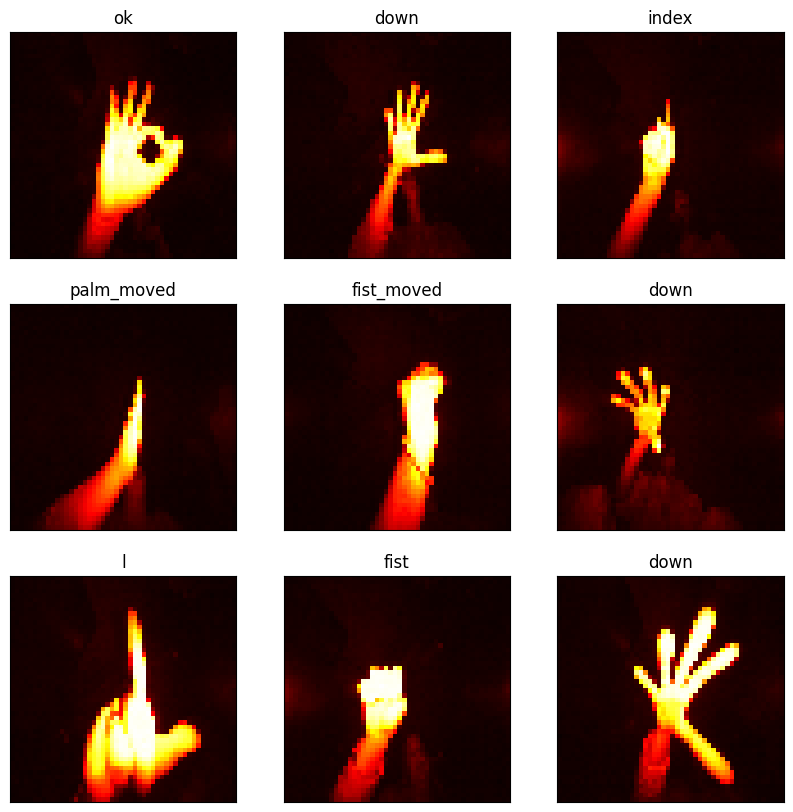

In [6]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [7]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [8]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10).astype('i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [9]:
# reshaping the data (1: This is the new channel dimension, indicating that the images are grayscale)
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)
input_data.shape

(20000, 50, 50, 1)

In [12]:
# Splitting Test and Train Set
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## Building and training the model

In [15]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Dropout is a prevention for overfitting
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#Softmax for multi-classification
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 54s 109ms/step - accuracy: 0.6829 - loss: 0.9064 - val_accuracy: 0.9953 - val_loss: 0.0170
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.9914 - loss: 0.0242 - val_accuracy: 0.9988 - val_loss: 0.0079
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 46s 105ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9992 - val_loss: 0.0083
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 51s 116ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9992 - val_loss: 0.0059
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 49s 111ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0056
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 48s 110ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9990 - val_loss: 0.0131


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

## Testing the model: Accuracy, Loss

In [18]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9992 - loss: 0.0094
Test accuracy: 99.90%


188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


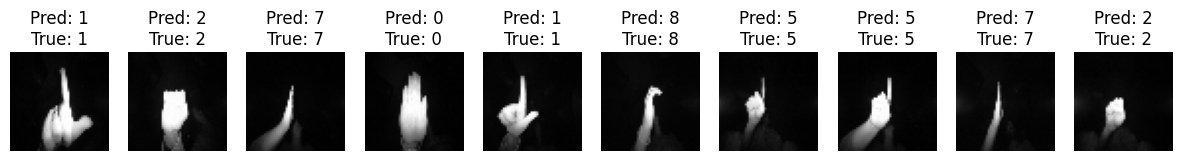

In [20]:
predictions = model.predict(X_test)

# Convert predictions from one-hot encoded format to label indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)  # Assuming y_test is also one-hot encoded

# Visualize the first few predictions
num_images = 10  # Number of images to display
plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')

plt.show()